Task4 

**Stock market prediction using historical and textual analysis**

In [22]:
#importing liabraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import joblib
import math

In [6]:
df= pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=978307200&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1129400000
1,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000
2,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000
3,2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000
4,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03
mean,1644.797604,1654.172952,1634.592972,1645.017200,1645.017200,3.272782e+09
std,663.867441,665.903384,661.494154,663.946038,663.946038,1.474020e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1148.999970,1157.667480,1140.119995,1149.467499,1149.467499,2.076878e+09
50%,1363.604981,1369.195007,1355.225036,1364.110046,1364.110046,3.337025e+09
75%,2078.070007,2085.909912,2067.010010,2079.115051,2079.115051,4.038788e+09
max,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,1.145623e+10


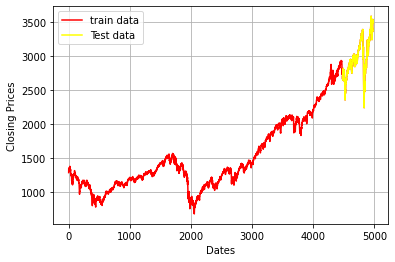

In [33]:
#train & test

train_data, test_data = df[:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Close'], 'red', label= 'train data')
plt.plot(test_data['Close'], 'yellow', label= 'Test data')
plt.legend()

In [17]:
#arima
model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4481
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -18567.612
Method:                       css-mle   S.D. of innovations             15.252
Date:                Mon, 19 Oct 2020   AIC                          37141.224
Time:                        19:16:23   BIC                          37160.447
Sample:                             1   HQIC                         37147.999
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3067      0.213      1.441      0.150      -0.110       0.724
ma.L1.D.Close    -0.0661      0.016     -4.222      0.000      -0.097      -0.035
                                    Root

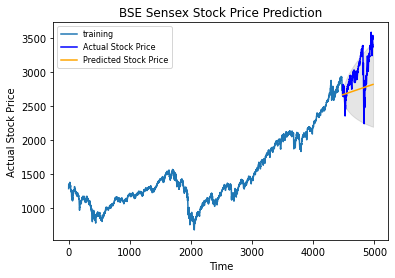

In [32]:
#prediction
fc, se, conf = fitted.forecast(498, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BSE Sensex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()



In [23]:
# Performance report
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 107536.746902914
MAE: 272.76243899844286
RMSE: 327.9279599285703
MAPE: 0.08809244241883206


In [34]:
from datetime import datetime
import string
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [38]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [40]:
df1 = pd.read_csv("/content/india-news-headlines.csv")

In [43]:
df1.describe()

,publish_date
count,1.254633e+06
mean,2.007305e+07
std,3.255826e+04
min,2.001010e+07
25%,2.004082e+07
50%,2.008103e+07
75%,2.010073e+07
max,2.011122e+07


In [44]:
df1.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [47]:
df1['publish_date'] = pd.to_datetime(df1['publish_date'],format='%Y%m%d')


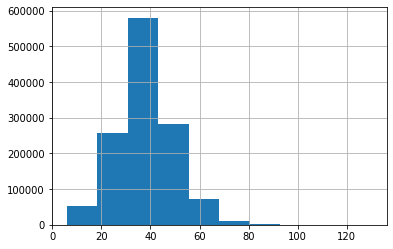

In [87]:
df1['headline_text'].str.len().hist()
plt.show()

In [49]:
df2 = df1[df1['publish_date']> '2005-06-29'].reset_index(drop=True)


In [50]:
df2.shape

(899197, 3)

In [55]:
headline_cats = [cat for cat in df2['headline_category'].value_counts().index if 'business' in cat]

In [56]:
headline_cats

['business.india-business',
 'business.international-business',
 'business.personal-finance',
 'business']

In [57]:
df2 = df2.loc[df2['headline_category'].str.find('business') !=-1].reset_index(drop=True)


In [58]:
df2.head()

,publish_date,headline_category,headline_text
0,2005-07-01,business.india-business,BK Birla group pens Rs 1;000-cr investment plan
1,2005-07-01,business.india-business,Acquisitions are way forward: Paul
2,2005-07-01,business.india-business,Central PSUs get purchase preference in govt o...
3,2005-07-01,business.india-business,Govt removes hurdles for GM to buy Daewoo Indi...
4,2005-07-01,business.india-business,Anil Ambani to make it big in entertainment


In [61]:
df3 = df2.groupby('publish_date').agg({'headline_category':'first','headline_text': '. '.join}).reset_index()

In [62]:
df3.head

<bound method NDFrame.head of      publish_date  ...                                      headline_text
0      2005-07-01  ...  BK Birla group pens Rs 1;000-cr investment pla...
1      2005-07-02  ...  Retail boom triggers ancillary industry growth...
2      2005-07-03  ...  India ideal for KPO industry. Airlines facing ...
3      2005-07-04  ...  Global CEOs; Indian owners: Why the strains ar...
4      2005-07-05  ...  Finolex Cables to forward integrate operations...
...           ...  ...                                                ...
2323   2011-12-11  ...  Indian banksamp39 exposure to European banks l...
2324   2011-12-12  ...  Bullion dominates futures market; agriculture ...
2325   2011-12-13  ...  Slowdown hits home as industrial output falls ...
2326   2011-12-14  ...  India may have to look abroad for N-cover. Doc...
2327   2011-12-15  ...  As Re falls; fuel price may go up. Rupee falls...

[2328 rows x 3 columns]>